In [8]:
import pandas as pd
import numpy as np

In [9]:
data=pd.read_csv('root2ai - Data.csv')

In [10]:
data['Target'].unique()

array(['Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security',
       'FinTech', 'Microservices', 'Neobanks', 'Robo Advising',
       'Stock Trading', 'Data Security', 'Reg Tech'], dtype=object)

In [11]:
Target={'Blockchain':0, 'Bigdata':1, 'credit reporting':2,
       'Cyber Security':3, 'FinTech':4, 'Microservices':5, 'Neobanks':6,
       'Robo Advising':7, 'Stock Trading':8, 'Data Security':9, 'Reg Tech':10}

In [12]:
data['Target']=data['Target'].map(Target)
data

,Text,Target
0,reserve bank forming expert committee based in...,0
1,director could play role financial system,0
2,preliminary discuss secure transaction study r...,0
3,security indeed prove essential transforming f...,0
4,bank settlement normally take three days based...,0
...,...,...
22699,fourth study discusses blockchain technology e...,10
22700,book finishes stating biggest issue emerging F...,10
22701,people culture cess,10
22702,author challenges execu tive lead change stop ...,10


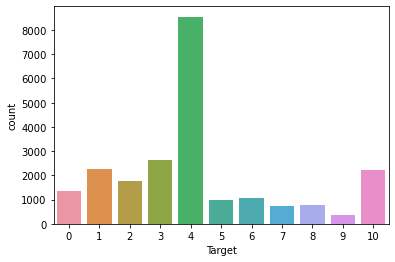

In [13]:
import seaborn as sns
sns.countplot(data['Target'])

In [14]:
import re

In [15]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejashwini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
corpus=[]

In [17]:
for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]',' ',str(data['Text'][i]))
    review = review.lower()
    review = review.split()
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)


In [18]:
data

,Text,Target
0,reserve bank forming expert committee based in...,0
1,director could play role financial system,0
2,preliminary discuss secure transaction study r...,0
3,security indeed prove essential transforming f...,0
4,bank settlement normally take three days based...,0
...,...,...
22699,fourth study discusses blockchain technology e...,10
22700,book finishes stating biggest issue emerging F...,10
22701,people culture cess,10
22702,author challenges execu tive lead change stop ...,10


In [19]:
len(np.unique(corpus))

20901

In [20]:
from sklearn.feature_extraction.text import CountVectorizer 

In [21]:
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()

In [22]:
y=data.iloc[:,-1:]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [24]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import tensorflow as tf
import os

VOCAB_SIZE=20911     #20911 unique words
MAXLEN=250
BATCH_SIZE=64
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=VOCAB_SIZE)

In [25]:
len(X_train[0])

218

In [26]:
X_train=sequence.pad_sequences(X_train,MAXLEN)
X_test=sequence.pad_sequences(X_test,MAXLEN)

CREATING THE MODEL

In [27]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE,32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          669152    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 677,505
Trainable params: 677,505
Non-trainable params: 0
_________________________________________________________________


TRAINING

In [29]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["acc"])

history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 29s 47ms/step - loss: 0.4075 - acc: 0.8149 - val_loss: 0.2817 - val_acc: 0.8840
Epoch 2/10
625/625 [==============================] - 33s 52ms/step - loss: 0.2494 - acc: 0.9054 - val_loss: 0.4100 - val_acc: 0.8552
Epoch 3/10
625/625 [==============================] - 29s 47ms/step - loss: 0.2035 - acc: 0.9251 - val_loss: 0.2931 - val_acc: 0.8918
Epoch 4/10
625/625 [==============================] - 34s 54ms/step - loss: 0.1726 - acc: 0.9387 - val_loss: 0.2933 - val_acc: 0.8870
Epoch 5/10
625/625 [==============================] - 35s 55ms/step - loss: 0.1540 - acc: 0.9441 - val_loss: 0.2981 - val_acc: 0.8782
Epoch 6/10
625/625 [==============================] - 30s 48ms/step - loss: 0.1353 - acc: 0.9527 - val_loss: 0.2967 - val_acc: 0.8912
Epoch 7/10
625/625 [==============================] - 33s 52ms/step - loss: 0.1233 - acc: 0.9554 - val_loss: 0.2964 - val_acc: 0.8948
Epoch 8/10
625/625 [==============================] - 41s 66ms

MAKING PREDICTIONS

In [30]:
y_pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[10668,  1485],
       [ 1832, 11015]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.86732

In [33]:
from sklearn.metrics import precision_score

In [35]:
precision_score(y_test,y_pred)

0.8573986144625204